# **LAB 6- Support Vector Machine (SVM) Classifier**

## **LAB TASKS**

## 1.Load a dataset for classification (e.g., Parkinson disease, Breast Cancer dataset).

In [25]:
import pandas as pd
import numpy as np

# parkinsons.data
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
df.shape

(195, 24)

## 2.Apply data preprocessing (handle missing values, encode categorical data).

In [27]:
def data_summary(dataframe):
    summary = pd.DataFrame({
        'Data Type': dataframe.dtypes,
        'Missing Values': dataframe.isnull().sum(),
        'Unique Values': dataframe.nunique(),
        'Encode catagorical': [dataframe[col].dtype == 'object' for col in dataframe.columns]
    })
    
    return summary

data_summary(df)

,Data Type,Missing Values,Unique Values,Encode catagorical
name,object,0,195,True
MDVP:Fo(Hz),float64,0,195,False
MDVP:Fhi(Hz),float64,0,195,False
MDVP:Flo(Hz),float64,0,195,False
MDVP:Jitter(%),float64,0,173,False
MDVP:Jitter(Abs),float64,0,19,False
MDVP:RAP,float64,0,155,False
MDVP:PPQ,float64,0,165,False
Jitter:DDP,float64,0,180,False
MDVP:Shimmer,float64,0,188,False


- No missing values in this data

- No column that i apply categorical encoding , because all are numerical except 'name' column.


##  3.Split the dataset into training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(['status', 'name'], axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 22), (39, 22), (156,), (39,))

## 4.Apply Grid search to find the optimal parameters 

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

## 5.Use those parameters to make predictions on the test set.

In [33]:
svm_model = SVC(**best_params)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

## 6.Evaluate performance using accuracy, precision, recall, and F1-score.

In [34]:
# evaluate performance using accuracy , precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy, precision, recall, f1

(0.8717948717948718, 0.8857142857142857, 0.96875, 0.9253731343283582)

## 7.Visualize the Confusion Matrix

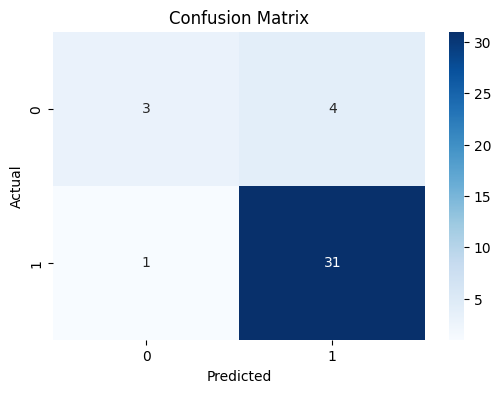

In [35]:
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()